In [14]:
import pandas as pd

# Load complaints data
df = pd.read_csv('../data/complaints.csv')

# Preview data
print(df.shape)
df.head()


/var/folders/pp/3nx806hs7bl388g7c6clvc5h0000gn/T/ipykernel_27271/4018446069.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/complaints.csv')


(9609797, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


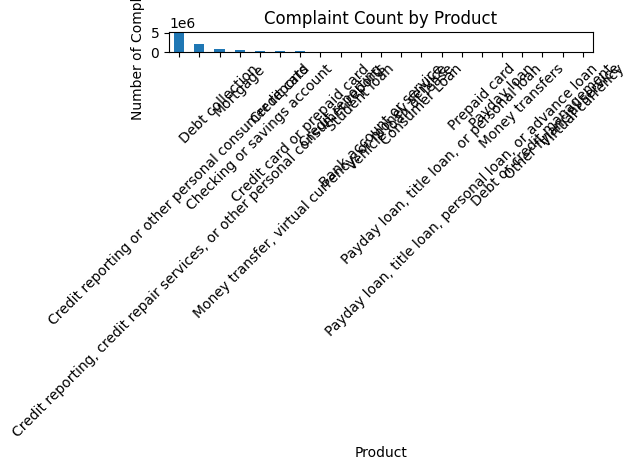

In [15]:
# Complaint count by product
product_counts = df['Product'].value_counts()

# Visualize
import matplotlib.pyplot as plt
product_counts.plot(kind='bar', title='Complaint Count by Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


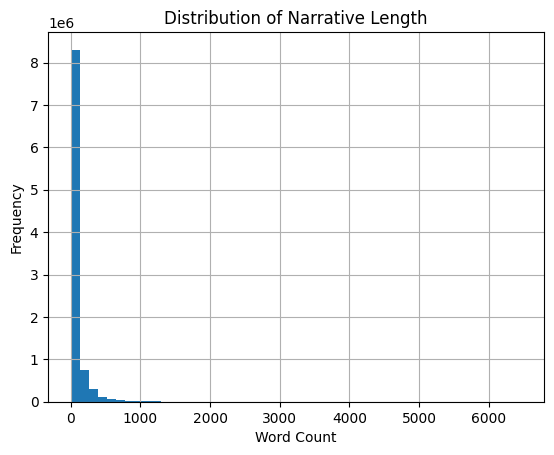

In [16]:
# Compute word count per narrative
df['narrative_word_count'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))

# Plot distribution
df['narrative_word_count'].hist(bins=50)
plt.title("Distribution of Narrative Length")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [17]:
# Count missing narratives
missing_narratives = df['Consumer complaint narrative'].isna().sum()
print(f"Missing narratives: {missing_narratives}")


Missing narratives: 6629041


In [18]:
target_products = [
    'Credit card', 'Personal loan', 
    'Buy Now, Pay Later (BNPL)', 
    'Savings account', 'Money transfers'
]

# Normalize case (optional)
df['Product'] = df['Product'].str.lower()

# Lowercase for filter
product_map = {
    'credit card': 'Credit card',
    'personal loan': 'Personal loan',
    'buy now, pay later': 'Buy Now, Pay Later (BNPL)',
    'savings account': 'Savings account',
    'money transfer': 'Money transfers'
}

df_filtered = df[
    df['Product'].isin(product_map.keys()) & 
    df['Consumer complaint narrative'].notna()
].copy()

# Standardize product names
df_filtered['Product'] = df_filtered['Product'].map(product_map)


In [19]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n+', ' ', text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)


import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n+', ' ', text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)


In [20]:
df_filtered.to_csv('../data/filtered_complaints.csv', index=False)
print("Filtered dataset saved to data/filtered_complaints.csv")


Filtered dataset saved to data/filtered_complaints.csv
